
K = 2

Points per cluster:
  Cluster 0: 3 points
  Cluster 1: 6 points

Centroid locations:
  Cluster 0: (9.00, 5.33)
  Cluster 1: (2.83, 5.33)



K = 3

Points per cluster:
  Cluster 0: 3 points
  Cluster 1: 3 points
  Cluster 2: 3 points

Centroid locations:
  Cluster 0: (9.00, 5.33)
  Cluster 1: (3.67, 8.00)
  Cluster 2: (2.00, 2.67)



K = 4

Points per cluster:
  Cluster 0: 2 points
  Cluster 1: 3 points
  Cluster 2: 3 points
  Cluster 3: 1 points

Centroid locations:
  Cluster 0: (8.50, 4.50)
  Cluster 1: (3.67, 8.00)
  Cluster 2: (2.00, 2.67)
  Cluster 3: (10.00, 7.00)


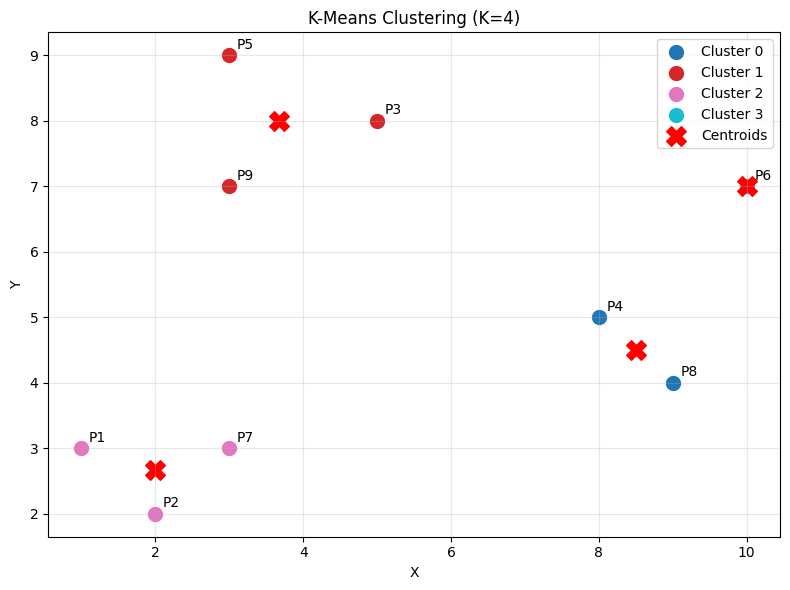


Summary of how shapes change with K:
K=2: Two clear groups, may combine similar points
K=3: More refined clustering, better separation
K=4: Even more detailed, but may over-segment


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
points = {
    'P1': (1, 3), 'P2': (2, 2), 'P3': (5, 8),
    'P4': (8, 5), 'P5': (3, 9), 'P6': (10, 7),
    'P7': (3, 3), 'P8': (9, 4), 'P9': (3, 7)
}
point_names = list(points.keys())
point_coords = np.array(list(points.values()))
for k in [2, 3, 4]:
    print(f"\n{'='*50}")
    print(f"K = {k}")
    print('='*50)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(point_coords)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    print(f"\nPoints per cluster:")
    for i in range(k):
        count = np.sum(labels == i)
        print(f"  Cluster {i}: {count} points")
    print("\nCentroid locations:")
    for i, centroid in enumerate(centroids):
        print(f"  Cluster {i}: ({centroid[0]:.2f}, {centroid[1]:.2f})")
    plt.figure(figsize=(8, 6))
    plt.title(f"K-Means Clustering (K={k})")
    colors = plt.cm.tab10(np.arange(k) / max(k-1, 1))
    for i in range(k):
        cluster_points = point_coords[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                   color=colors[i], s=100, label=f'Cluster {i}')
    plt.scatter(centroids[:, 0], centroids[:, 1], 
               c='red', marker='X', s=200, label='Centroids')
    for i, (name, coord) in enumerate(points.items()):
        plt.text(coord[0] + 0.1, coord[1] + 0.1, name, fontsize=10)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()
print("\nSummary of how shapes change with K:")
print("K=2: Two clear groups, may combine similar points")
print("K=3: More refined clustering, better separation")
print("K=4: Even more detailed, but may over-segment")